In [1]:
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

In [3]:
#Loading Data into a DataFrame
df=pd.read_csv("C:/Users/phgtk/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_original=pd.read_csv("C:/Users/phgtk/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
#Checking for null valuss
print(df.isnull().sum())
'''Infrence - We have no null values hence no row/column has to be dropped'''
grouped = df.columns.to_series().groupby(df.dtypes)

# Print columns grouped by data type
for dtype, columns in grouped:
    print(f'Data Type: {dtype}')
    print(f'Columns: {list(columns)}')
    print()
df.nunique()

(7043, 21)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Data Type: int64
Columns: ['SeniorCitizen', 'tenure']

Data Type: float64
Columns: ['MonthlyCharges']

Data Type: object
Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']



customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
#STEP 2 - Data Preprocessing
#a) Converting String Datavalues to binary/integer values
#In the following Columns ['gender', 'Partner', 'Dependents','PhoneService','PaperlessBilling','Churn'] 
     #0 = No and 1 = Yes
#In the following Columns ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
          #0 = No , 1 = Yes, 2= No internet Service 
#In Multiple Lines Column 0 = No , 1 = Yes, 2= No phone service
#In InternetService	 Column 0= No Service 1 = DSL and 2 =Fibre Optic
#Encoding other named categories with OneHotEncoder creating additional binary columns

In [4]:
#STEP 2 - Data Preprocessing
#a) Converting String Datavalues to binary/integer values
''' In the following Columns ['gender', 'Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']
0 = No and 1 = Yes'''
columns_to_encode=['gender', 'Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']
encoder=OrdinalEncoder()
df[columns_to_encode]=encoder.fit_transform(df[columns_to_encode])

In [5]:
''' In the following Columns ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
0 = No , 1 = Yes, 2= No internet Service '''
columns_to_encode=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
ordinal_mapping={'No':0.0,'Yes':1.0,'No internet service':2.0}
for x in columns_to_encode:
    df[x]=df[x].map(ordinal_mapping)
#In Multiple Lines Column 0 = No , 1 = Yes, 2= No phone service
ordinal_mapping={'No':0.0,'Yes':1.0,'No phone service':2.0}
df['MultipleLines']=df['MultipleLines'].map(ordinal_mapping) 
#In InternetService	 Column 0= No Service 1 = DSL and 2 =Fibre Optic
ordinal_mapping={'No':0.0,'DSL':1.0,'Fiber optic':2.0}
df['InternetService']=df['InternetService'].map(ordinal_mapping)   

In [6]:
#Encoding other named categories with OneHotEncoder creating additional binary columns
columns_to_encode=['Contract','PaymentMethod']
encoder=OneHotEncoder()
data_encoded=encoder.fit_transform(df[columns_to_encode])
encoded_df=pd.DataFrame(data_encoded.toarray(),columns=encoder.get_feature_names_out(columns_to_encode))
encoded_df

,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df_main=pd.concat([df,encoded_df],axis=1)
churn_df=df_main.drop(columns=['Contract','PaymentMethod','customerID'],axis=1)
churn_df #df_churn is the dataframe we are gonna work with


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,2.0,1.0,0.0,1.0,...,29.85,29.85,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,1.0,1.0,0.0,...,56.95,1889.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0,0.0,0.0,2,1.0,0.0,1.0,1.0,1.0,...,53.85,108.15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0,0.0,0.0,45,0.0,2.0,1.0,1.0,0.0,...,42.30,1840.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,2.0,0.0,0.0,...,70.70,151.65,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,1.0,1.0,0.0,...,84.80,1990.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,2.0,0.0,1.0,...,103.20,7362.9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,0,1.0,1.0,11,0.0,2.0,1.0,1.0,0.0,...,29.60,346.45,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,2.0,0.0,0.0,...,74.40,306.6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
#STEP 3 - Exploratory Data Analysis and Data Visualisation using seaborn and matplotlib
#Plotting different columns and visualising their relations

'INFERENCE ---> The people with Fibre optic as internet service are more likely to churn'

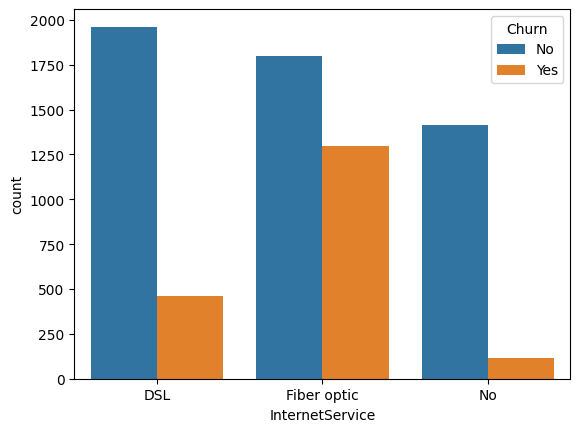

In [9]:
#Types of Internet Services with hue as churn
sns.countplot(data=df_original,x='InternetService',hue='Churn')
'''INFERENCE ---> The people with Fibre optic as internet service are more likely to churn'''

'INFRENCE ---> The people with phone service are more likely to churn'

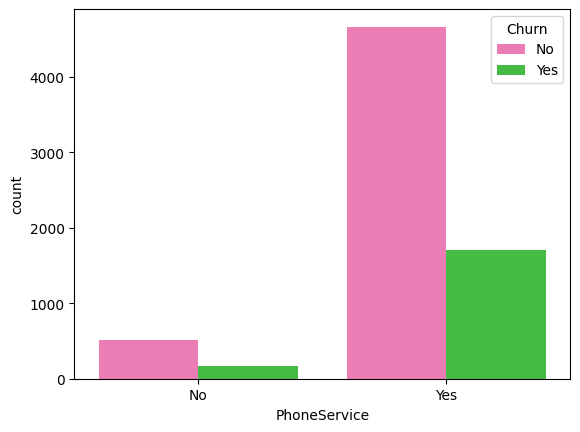

In [10]:

custom_palette1 = sns.color_palette(["#FF69B4", "#32CD32"])
sns.countplot(data=df_original,x='PhoneService',hue='Churn',palette=custom_palette1)
'''INFRENCE ---> The people with phone service are more likely to churn'''

'INFERENCE---> Gender doesnt really affect churn or no churn'

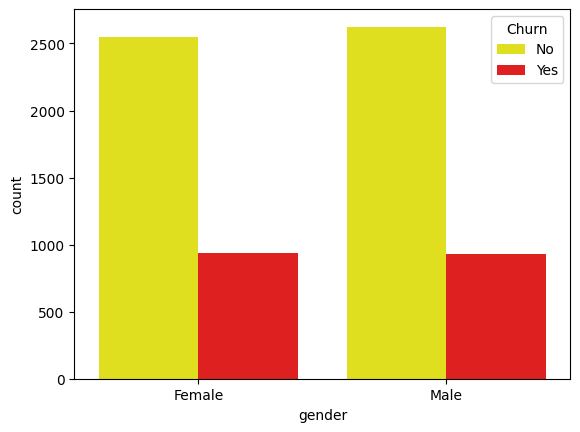

In [11]:
custom_palette2 = sns.color_palette(["#FFFF00", "#FF0000"])
sns.countplot(data=df_original,x='gender',hue='Churn',palette=custom_palette2)

'''INFERENCE---> Gender doesnt really affect churn or no churn'''

' INFERENCE ---> Less number of customers are senior citizens yet they are more likely to churn given this number'

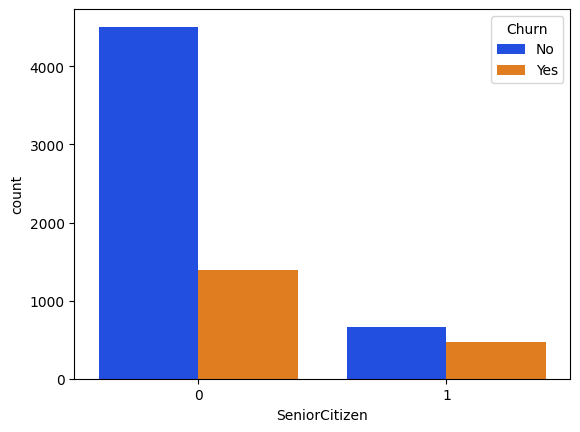

In [12]:
sns.countplot(data=df_original,x='SeniorCitizen',hue='Churn',palette='bright')
''' INFERENCE ---> Less number of customers are senior citizens yet they are more likely to churn given this number'''

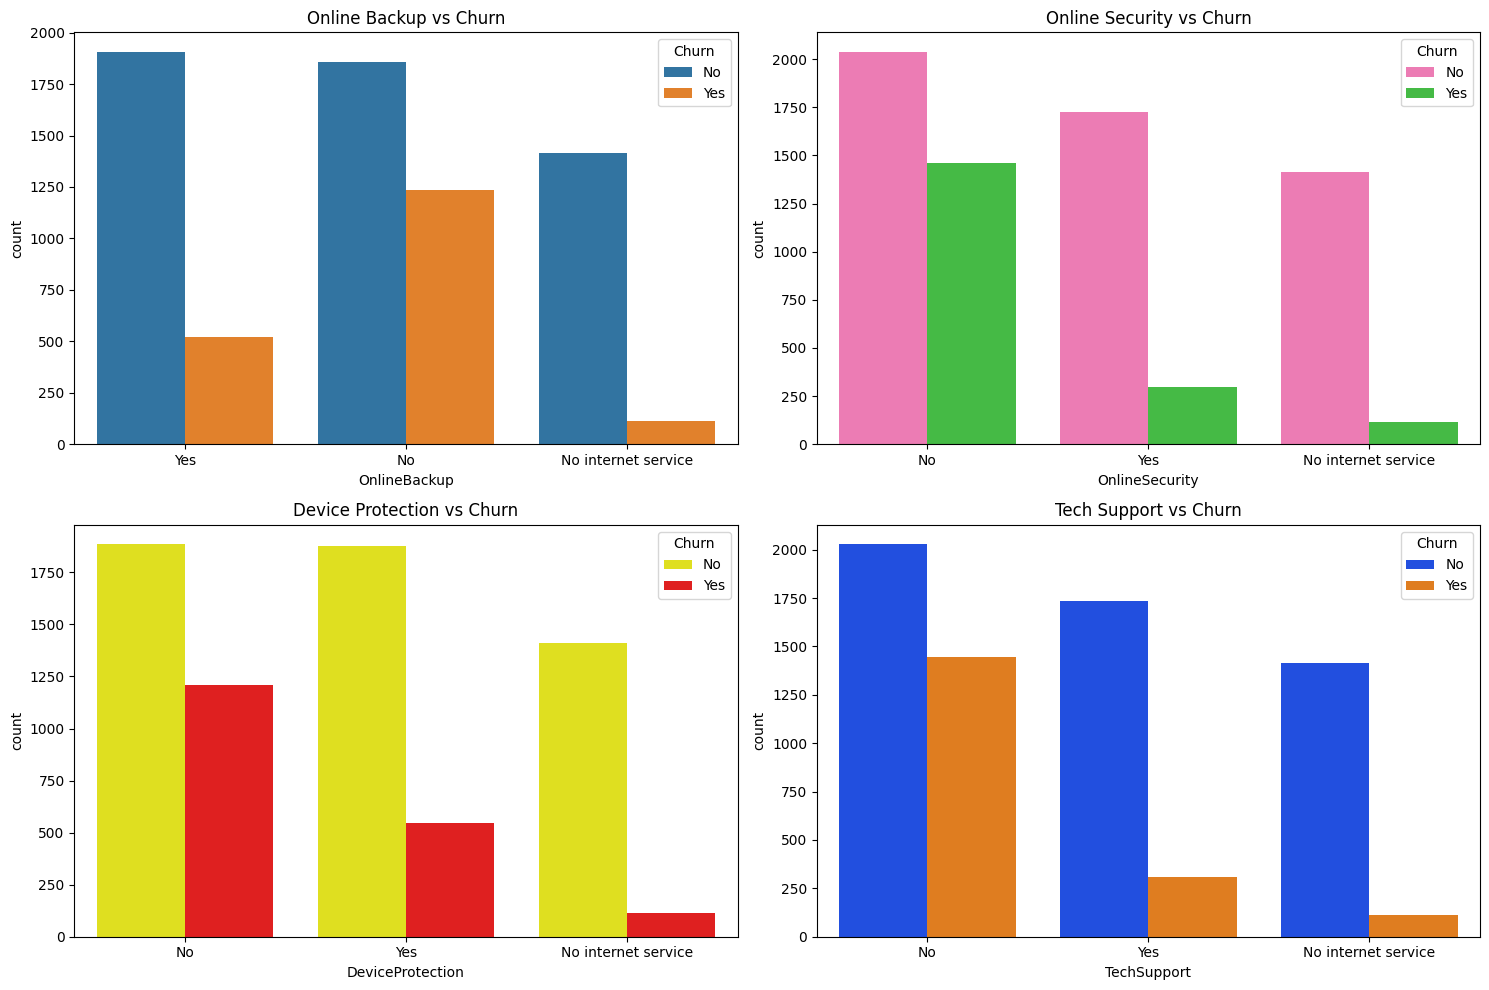

'INFRENCES AND INSIGHTS --->\nThe Customers with no online backup are more likely to churn \nThe Customers with no online security are more likely to churn\nThe Customers with no device protection are more likely to churn\nThe  Customers with no tech support are more likely to churn'

In [13]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'OnlineBackup' with hue='Churn'
sns.countplot(ax=axes[0, 0], data=df_original, x='OnlineBackup', hue='Churn')
axes[0, 0].set_title('Online Backup vs Churn')

# Plot for 'OnlineSecurity' without hue
sns.countplot(ax=axes[0, 1], data=df_original, x='OnlineSecurity',hue='Churn',palette=custom_palette1)
axes[0, 1].set_title('Online Security vs Churn')

# Plot for 'DeviceProtection' without hue
sns.countplot(ax=axes[1, 0], data=df_original, x='DeviceProtection',hue='Churn',palette=custom_palette2)
axes[1, 0].set_title('Device Protection vs Churn')

# Plot for 'TechSupport' without hue
sns.countplot(ax=axes[1, 1], data=df_original, x='TechSupport',hue='Churn',palette='bright')
axes[1, 1].set_title('Tech Support vs Churn')

# Adjust layout
plt.tight_layout()
plt.show()
'''INFRENCES AND INSIGHTS --->
The Customers with no online backup are more likely to churn 
The Customers with no online security are more likely to churn
The Customers with no device protection are more likely to churn
The  Customers with no tech support are more likely to churn'''

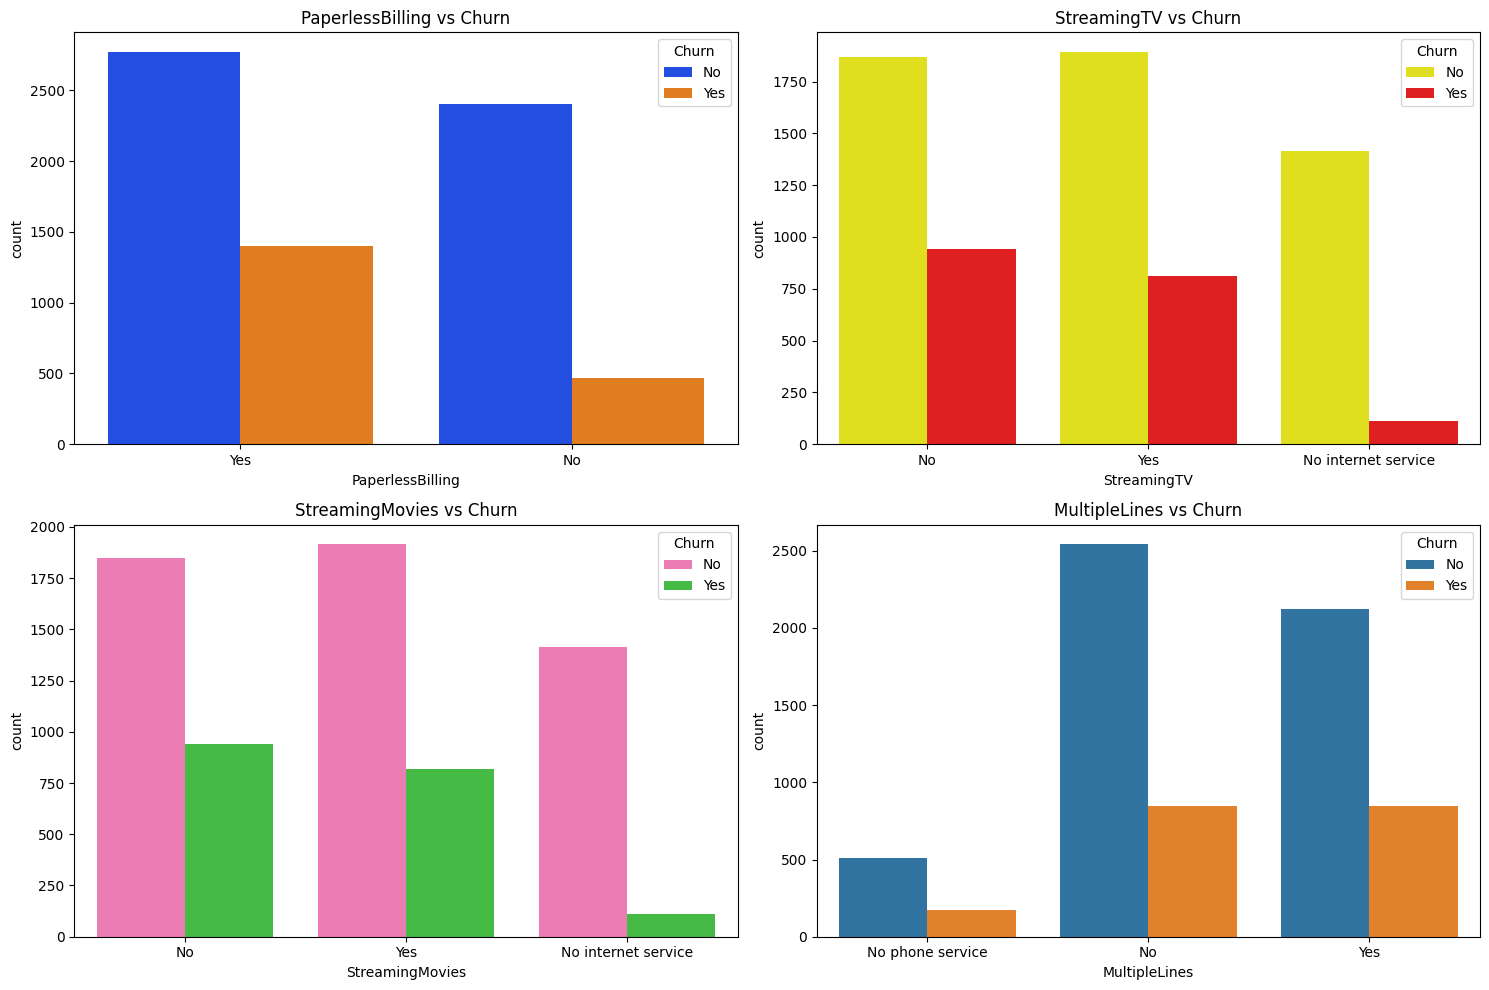

In [14]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for 'OnlineBackup' with hue='Churn'
sns.countplot(ax=axes[0, 0], data=df_original, x='PaperlessBilling', hue='Churn',palette='bright')
axes[0, 0].set_title('PaperlessBilling vs Churn')

# Plot for 'OnlineSecurity' without hue
sns.countplot(ax=axes[0, 1], data=df_original, x='StreamingTV',hue='Churn',palette=custom_palette2)
axes[0, 1].set_title('StreamingTV vs Churn')

# Plot for 'DeviceProtection' without hue
sns.countplot(ax=axes[1, 0], data=df_original, x='StreamingMovies',hue='Churn',palette=custom_palette1)
axes[1, 0].set_title('StreamingMovies vs Churn')

# Plot for 'TechSupport' without hue
sns.countplot(ax=axes[1, 1], data=df_original, x='MultipleLines',hue='Churn')
axes[1, 1].set_title('MultipleLines vs Churn')

# Adjust layout
plt.tight_layout()

array([[<Axes: xlabel='SeniorCitizen', ylabel='SeniorCitizen'>,
        <Axes: xlabel='tenure', ylabel='SeniorCitizen'>,
        <Axes: xlabel='MonthlyCharges', ylabel='SeniorCitizen'>],
       [<Axes: xlabel='SeniorCitizen', ylabel='tenure'>,
        <Axes: xlabel='tenure', ylabel='tenure'>,
        <Axes: xlabel='MonthlyCharges', ylabel='tenure'>],
       [<Axes: xlabel='SeniorCitizen', ylabel='MonthlyCharges'>,
        <Axes: xlabel='tenure', ylabel='MonthlyCharges'>,
        <Axes: xlabel='MonthlyCharges', ylabel='MonthlyCharges'>]],
      dtype=object)

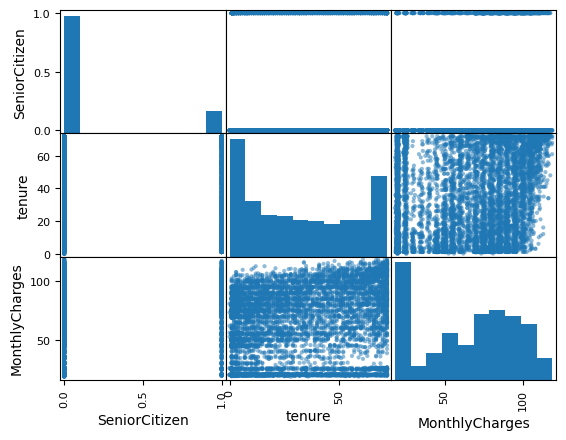

In [117]:
scatter_matrix(df_original)

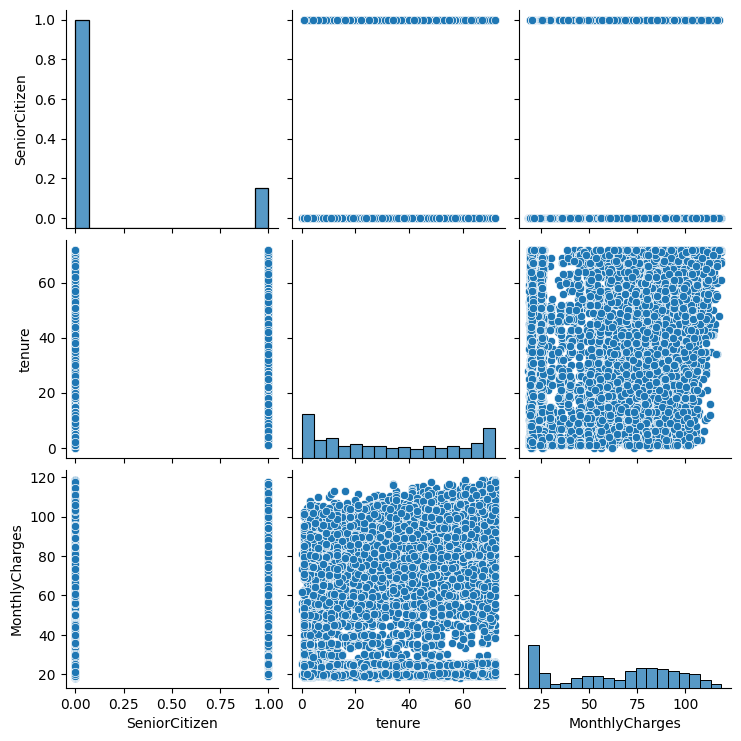

In [118]:
sns.pairplot(df_original)

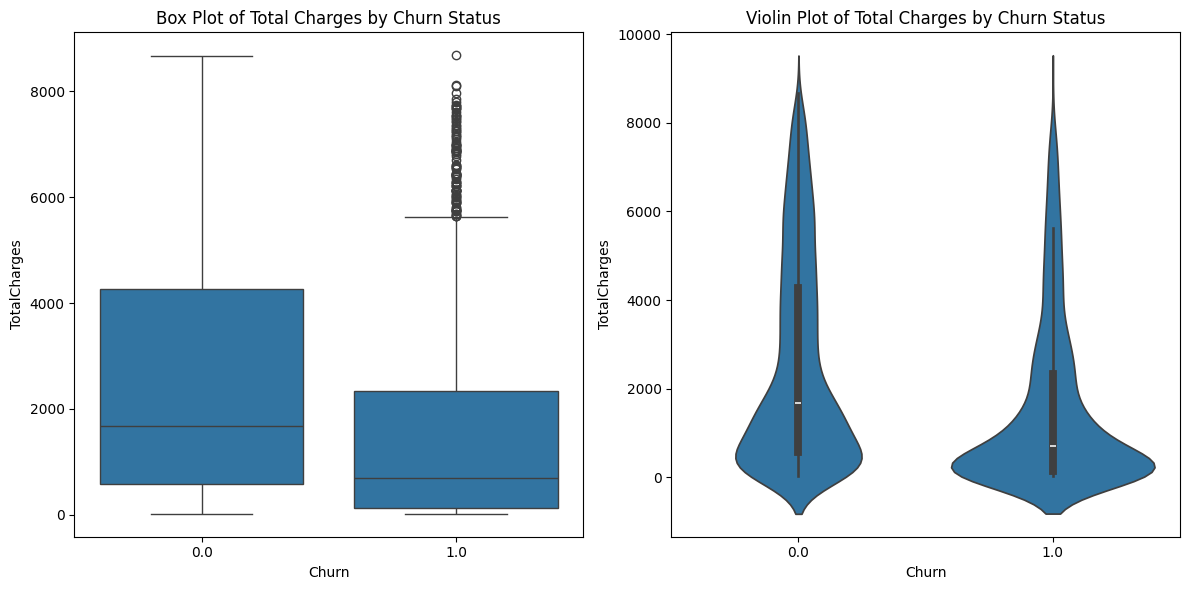

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot the distribution of Total Charges for each Churn category
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Box Plot of Total Charges by Churn Status')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Churn', y='TotalCharges')
plt.title('Violin Plot of Total Charges by Churn Status')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\phgtk\AppData\Local\Temp\ipykernel_10660\1498067940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges',palette=custom_palette1)


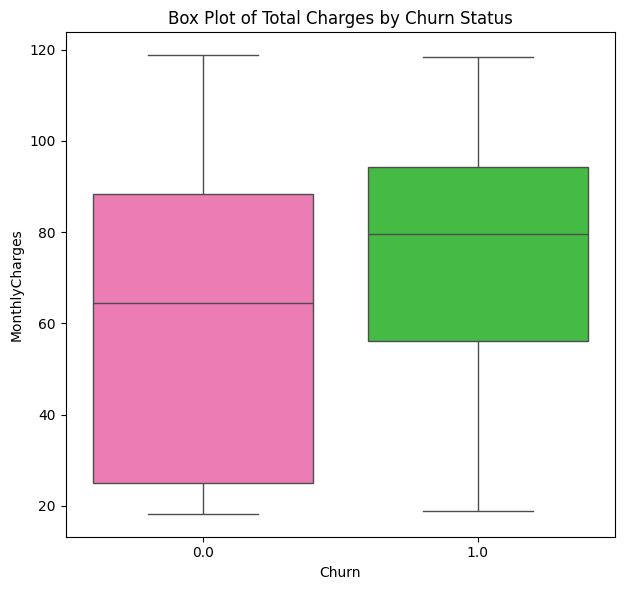

'INFERENCE --->  Customers with more monthly charges are likely to churn though their annual charges may be low'

In [16]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Plot the distribution of Total Charges for each Churn category
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges',palette=custom_palette1)
plt.title('Box Plot of Total Charges by Churn Status')
plt.tight_layout()
plt.show()
'''INFERENCE --->  Customers with more monthly charges are likely to churn though their annual charges may be low'''

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

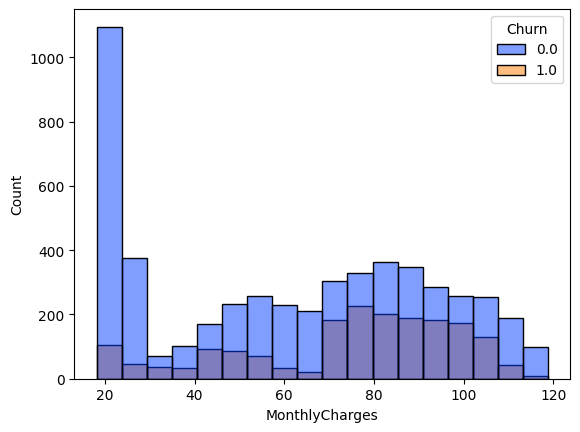

In [19]:
sns.histplot(data=churn_df,x='MonthlyCharges',hue='Churn',palette='bright')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

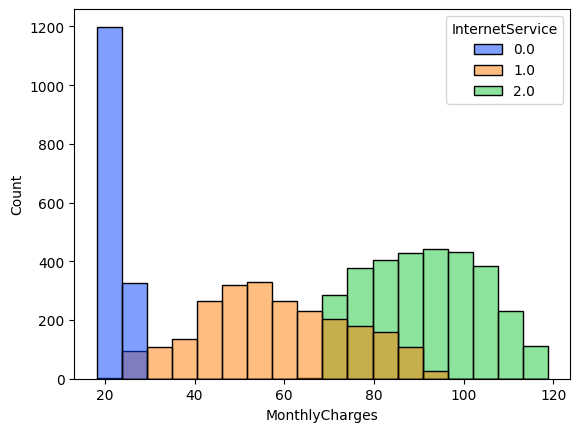

In [20]:
sns.histplot(data=churn_df,x='MonthlyCharges',hue='InternetService',palette='bright')

In [123]:
print("Quick inferences ---> People with InternetServices but no additional tech supports,Streaming services etc are more likely to Churn.\nCustomers with costly monthly charges are more likely to churn.\nFibre Optic is most costly than DSL")

Quick inferences ---> People with InternetServices but no additional tech supports,Streaming services etc are more likely to Churn.
Customers with costly monthly charges are more likely to churn.
Fibre Optic is most costly than DSL


In [34]:
#STEP4 - Training different ML Models and finding the best fit.
churn_df
                                                          

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,2.0,1.0,0.0,1.0,...,29.85,29.85,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,1.0,1.0,0.0,...,56.95,1889.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0,0.0,0.0,2,1.0,0.0,1.0,1.0,1.0,...,53.85,108.15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0,0.0,0.0,45,0.0,2.0,1.0,1.0,0.0,...,42.30,1840.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,2.0,0.0,0.0,...,70.70,151.65,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,1.0,1.0,0.0,...,84.80,1990.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,2.0,0.0,1.0,...,103.20,7362.90,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,0,1.0,1.0,11,0.0,2.0,1.0,1.0,0.0,...,29.60,346.45,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,2.0,0.0,0.0,...,74.40,306.60,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
churn_df = churn_df.apply(pd.to_numeric, errors='coerce')
churn_df = churn_df.fillna(0)
X=churn_df.drop(columns=['Churn'],axis=1)
y=churn_df['Churn']

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
grouped = churn_df.columns.to_series().groupby(df.dtypes)

# Print columns grouped by data type
for dtype, columns in grouped:
    print(f'Data Type: {dtype}')
    print(f'Columns: {list(columns)}')
    print()

Data Type: int64
Columns: ['SeniorCitizen', 'tenure']

Data Type: float64
Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'Churn']

Data Type: object
Columns: ['TotalCharges']



In [11]:
def report_model(model,color):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Generate classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    import seaborn as sns
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

    
    

In [41]:
#MODEL 1 - Logistic Regression
model=LogisticRegression(max_iter=100000)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']  # Algorithms to use in the optimization problem
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))




Best parameters found:  {'C': 1, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.80


Accuracy: 0.8041
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1546
         1.0       0.67      0.53      0.59       567

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



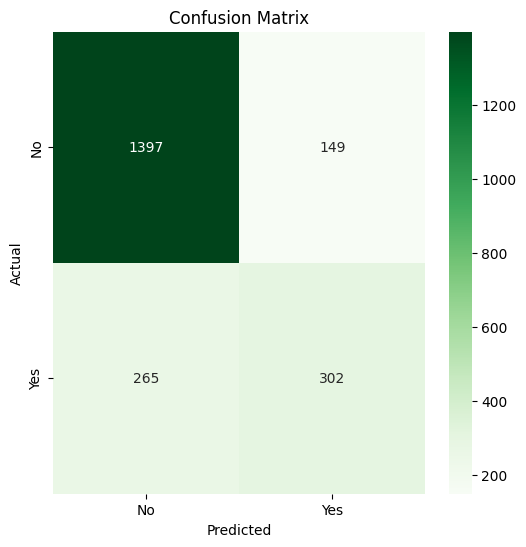

In [42]:
report_model(grid_search,'Greens')

In [43]:
#Model 2- KNN Classifier
knn=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7,9,11]  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation accuracy: 0.78


Accuracy: 0.7752
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1546
         1.0       0.63      0.40      0.49       567

    accuracy                           0.78      2113
   macro avg       0.72      0.66      0.67      2113
weighted avg       0.76      0.78      0.76      2113



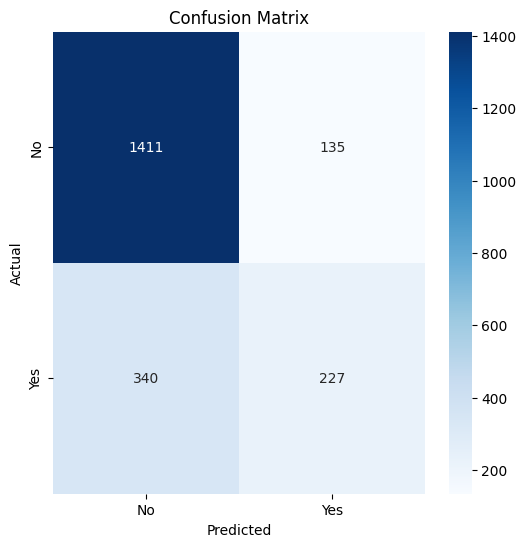

In [44]:
report_model(grid_search,'Blues')

In [ ]:
#Model-3 - Support Vector Classifier
svc = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Specifies the kernel type to be used in the algorithm
}

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Accuracy: 0.8031
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1546
         1.0       0.71      0.44      0.55       567

    accuracy                           0.80      2113
   macro avg       0.77      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



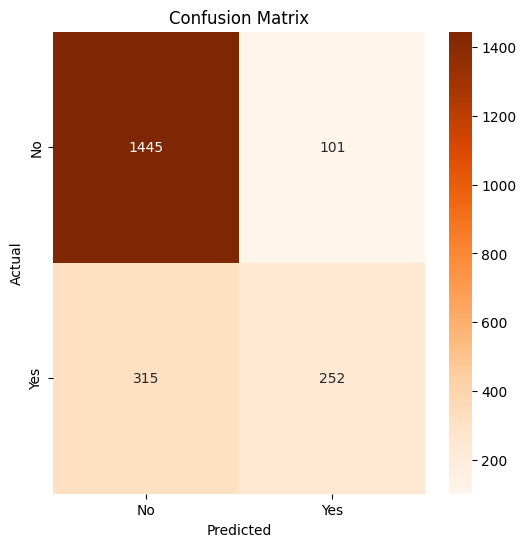

In [12]:
svc=SVC(C=10000)
report_model(svc,'Oranges')

In [14]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30]  # Maximum number of levels in the tree
      # Minimum number of samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\phgtk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation accuracy: 0.80


Accuracy: 0.8041
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1546
         1.0       0.68      0.51      0.58       567

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



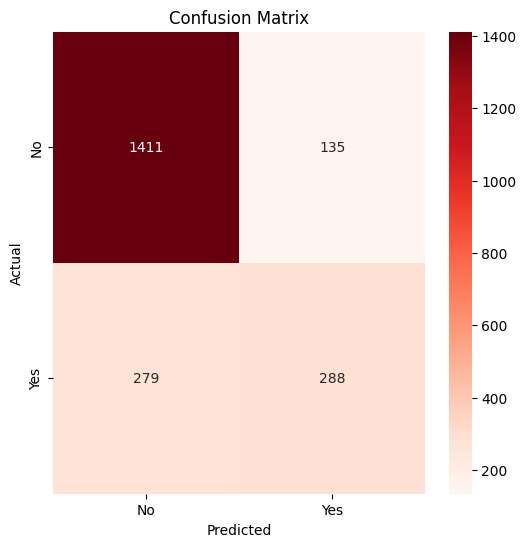

In [30]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, max_features='sqrt')

report_model(rf,'Reds')

In [32]:
gb = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best cross-validation accuracy: 0.81


Accuracy: 0.8064
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1546
         1.0       0.69      0.51      0.59       567

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



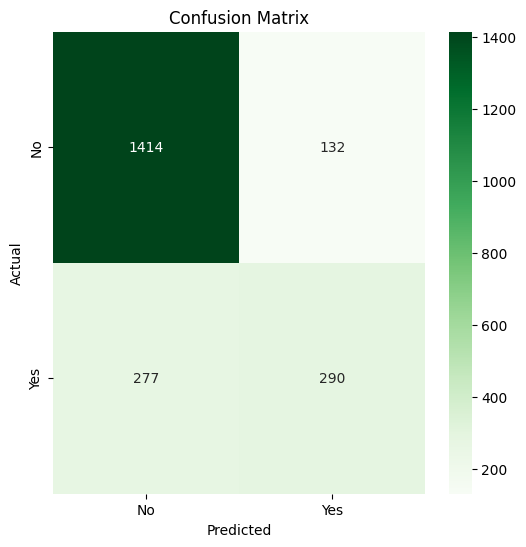

In [35]:
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0)
report_model(gb,'Greens')

Accuracy: 0.67
Accuracy: 0.6730
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74      1546
         1.0       0.44      0.74      0.55       567

    accuracy                           0.67      2113
   macro avg       0.65      0.69      0.65      2113
weighted avg       0.75      0.67      0.69      2113



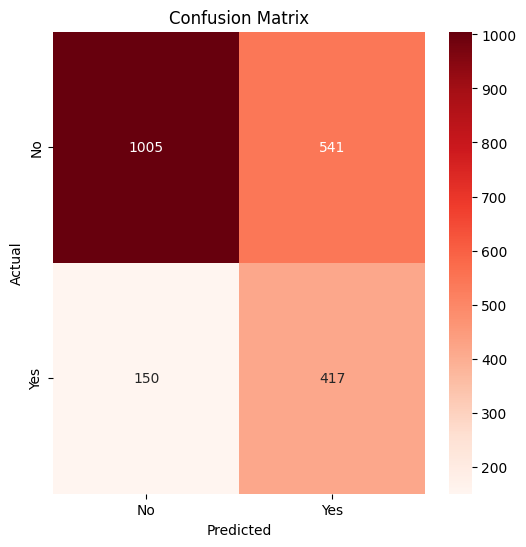

In [47]:
text_clf = MultinomialNB()

# Fit the model on the training data
text_clf.fit(X_train, y_train)

# Predict the test set labels
predicted = text_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.2f}")
report_model(text_clf,'Reds')

Accuracy: 0.74
Accuracy: 0.7416
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.74      0.81      1546
         1.0       0.51      0.75      0.61       567

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.74      0.75      2113



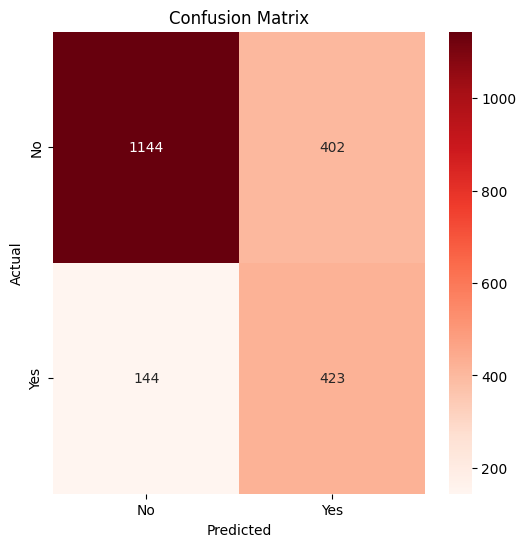

In [48]:
from sklearn.naive_bayes import BernoulliNB
text_clf = BernoulliNB()

# Fit the model on the training data
text_clf.fit(X_train, y_train)

# Predict the test set labels
predicted = text_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.2f}")
report_model(text_clf,'Reds')

Accuracy: 0.73
Accuracy: 0.7250
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.79      1546
         1.0       0.49      0.82      0.61       567

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113



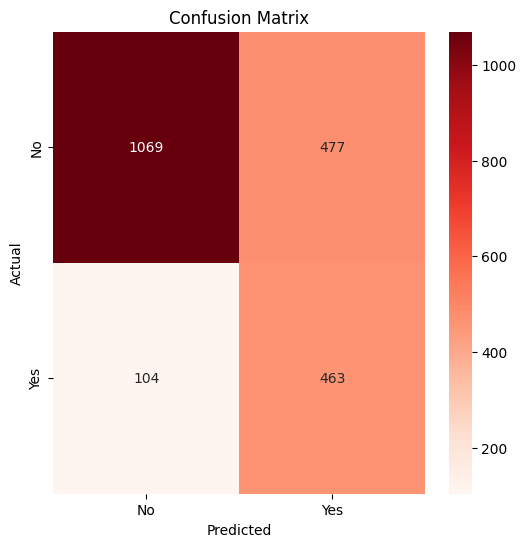

In [49]:
from sklearn.naive_bayes import GaussianNB
text_clf = GaussianNB()

# Fit the model on the training data
text_clf.fit(X_train, y_train)

# Predict the test set labels
predicted = text_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.2f}")
report_model(text_clf,'Reds')

Accuracy: 0.74
Accuracy: 0.7383
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80      1546
         1.0       0.51      0.80      0.62       567

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



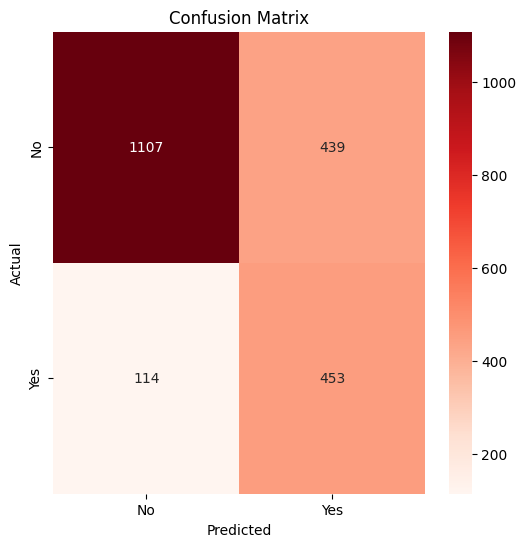

In [50]:
from sklearn.naive_bayes import CategoricalNB
text_clf = CategoricalNB()

# Fit the model on the training data
text_clf.fit(X_train, y_train)

# Predict the test set labels
predicted = text_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.2f}")
report_model(text_clf,'Reds')

In [51]:
#After Comparing Metrics
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0)
final_model=gb